In [66]:
%matplotlib inline
from sklearn import metrics

import pandas
import numpy

In [68]:
clusters = pandas.read_csv('clusters.0002.n2.csv', delimiter=';')
print('l', len(clusters))
clusters.head()

l 2551


,latitude,longitude,cluster
0,41.389032,2.113948,0
1,41.389013,2.113919,0
2,41.388853,2.113671,0
3,41.388904,2.113750,0
4,41.388978,2.113862,0


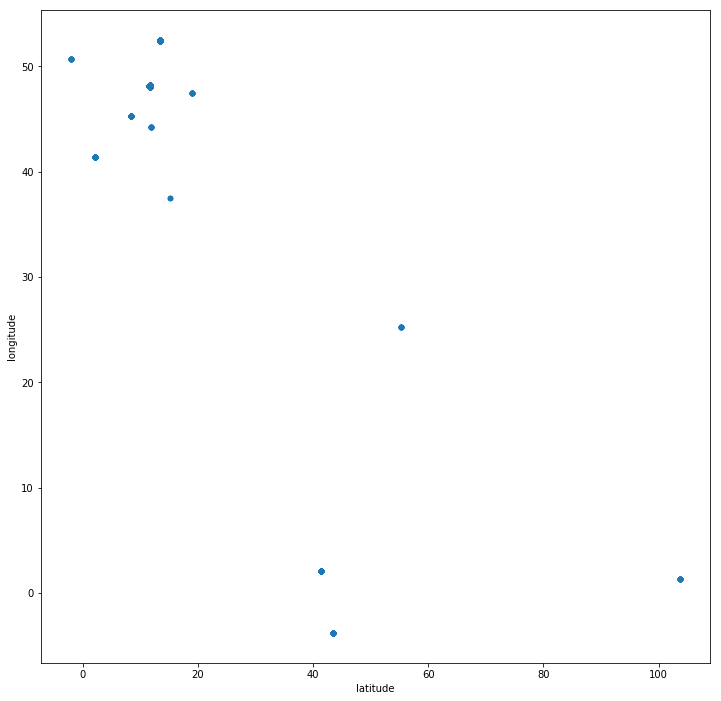

In [91]:
clusters.plot.scatter('latitude', 'longitude', figsize=(12,12))

In [76]:
def filter_position(df, latlon, dist):
    latmin, latmax = latlon[0]-dist, latlon[0]+dist
    lonmin, lonmax = latlon[1]-dist, latlon[1]+dist
    
    w = (df.latitude > latmin) & (df.latitude < latmax) & \
        (df.longitude > lonmin) & (df.longitude < lonmax)
    
    return df[w]

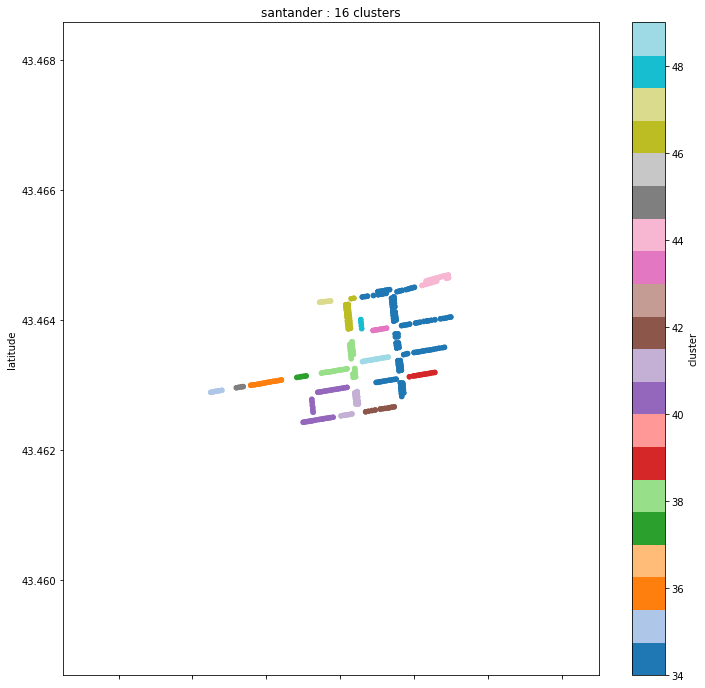

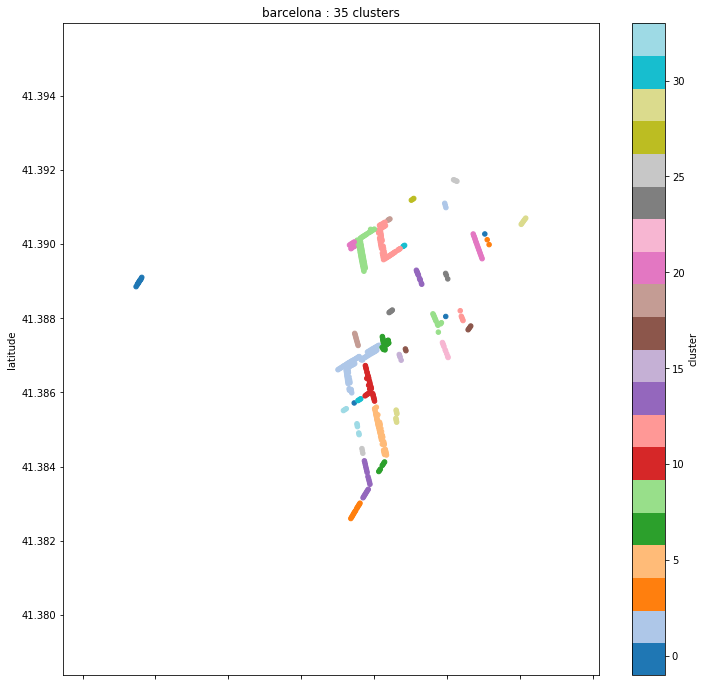

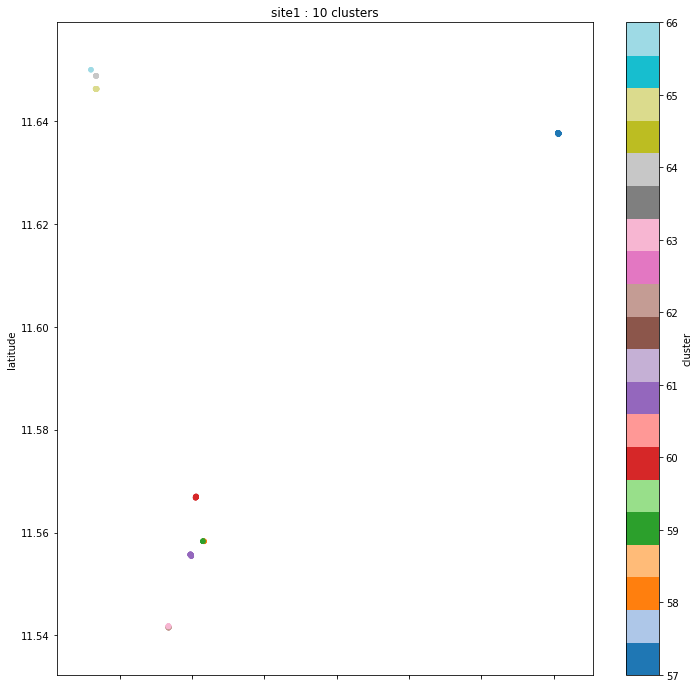

In [93]:
locations = {
    'vercelli': [45.3203047, 8.3890491],
    'santander': [43.4614014, -3.8461566],
    'barcelona': [41.3948976, 2.0787275],
    
    'berlin': [52.5034194, 13.2716772],
    'site1': [11.5534194, 48.2716772],
}

def plot_location(clusters, location, name):
    filtered = filter_position(clusters, location, 1.1)
    n_clusters = len(numpy.unique(filtered.cluster))
    title = '{} : {} clusters'.format(name, n_clusters)
    nn = len(filtered.cluster)
    if nn == 0:
        return

    filtered.plot.scatter('longitude', 'latitude',
                          title=title, c='cluster',
                          colormap='tab20', figsize=(12,12))

for name, location in locations.items():
    plot_location(clusters, location, name)
